Libraries Import

In [1]:
!pip install --upgrade kneed

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib as mtp
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import r2_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt   
import seaborn as sns
from xgboost import XGBRegressor

In [3]:
ds=pd.read_csv("Visibility_data.csv")

EDA

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75083 entries, 0 to 75082
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              75083 non-null  object 
 1   VISIBILITY        75083 non-null  float64
 2   DRYBULBTEMPF      75083 non-null  float64
 3   WETBULBTEMPF      75083 non-null  float64
 4   DewPointTempF     75083 non-null  float64
 5   RelativeHumidity  75083 non-null  float64
 6   WindSpeed         75083 non-null  float64
 7   WindDirection     75083 non-null  float64
 8   StationPressure   75083 non-null  float64
 9   SeaLevelPressure  75083 non-null  float64
 10  Precip            75083 non-null  float64
dtypes: float64(10), object(1)
memory usage: 6.3+ MB


In [5]:
ds.isnull().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

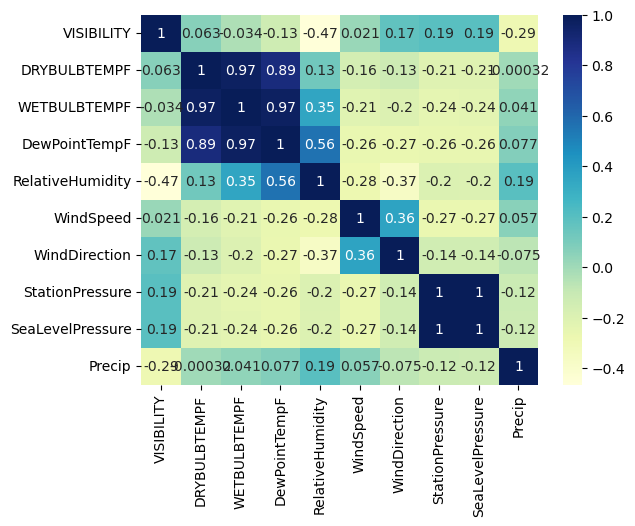

In [6]:
df_plot = sns.heatmap(ds.corr(), cmap="YlGnBu", annot=True) 

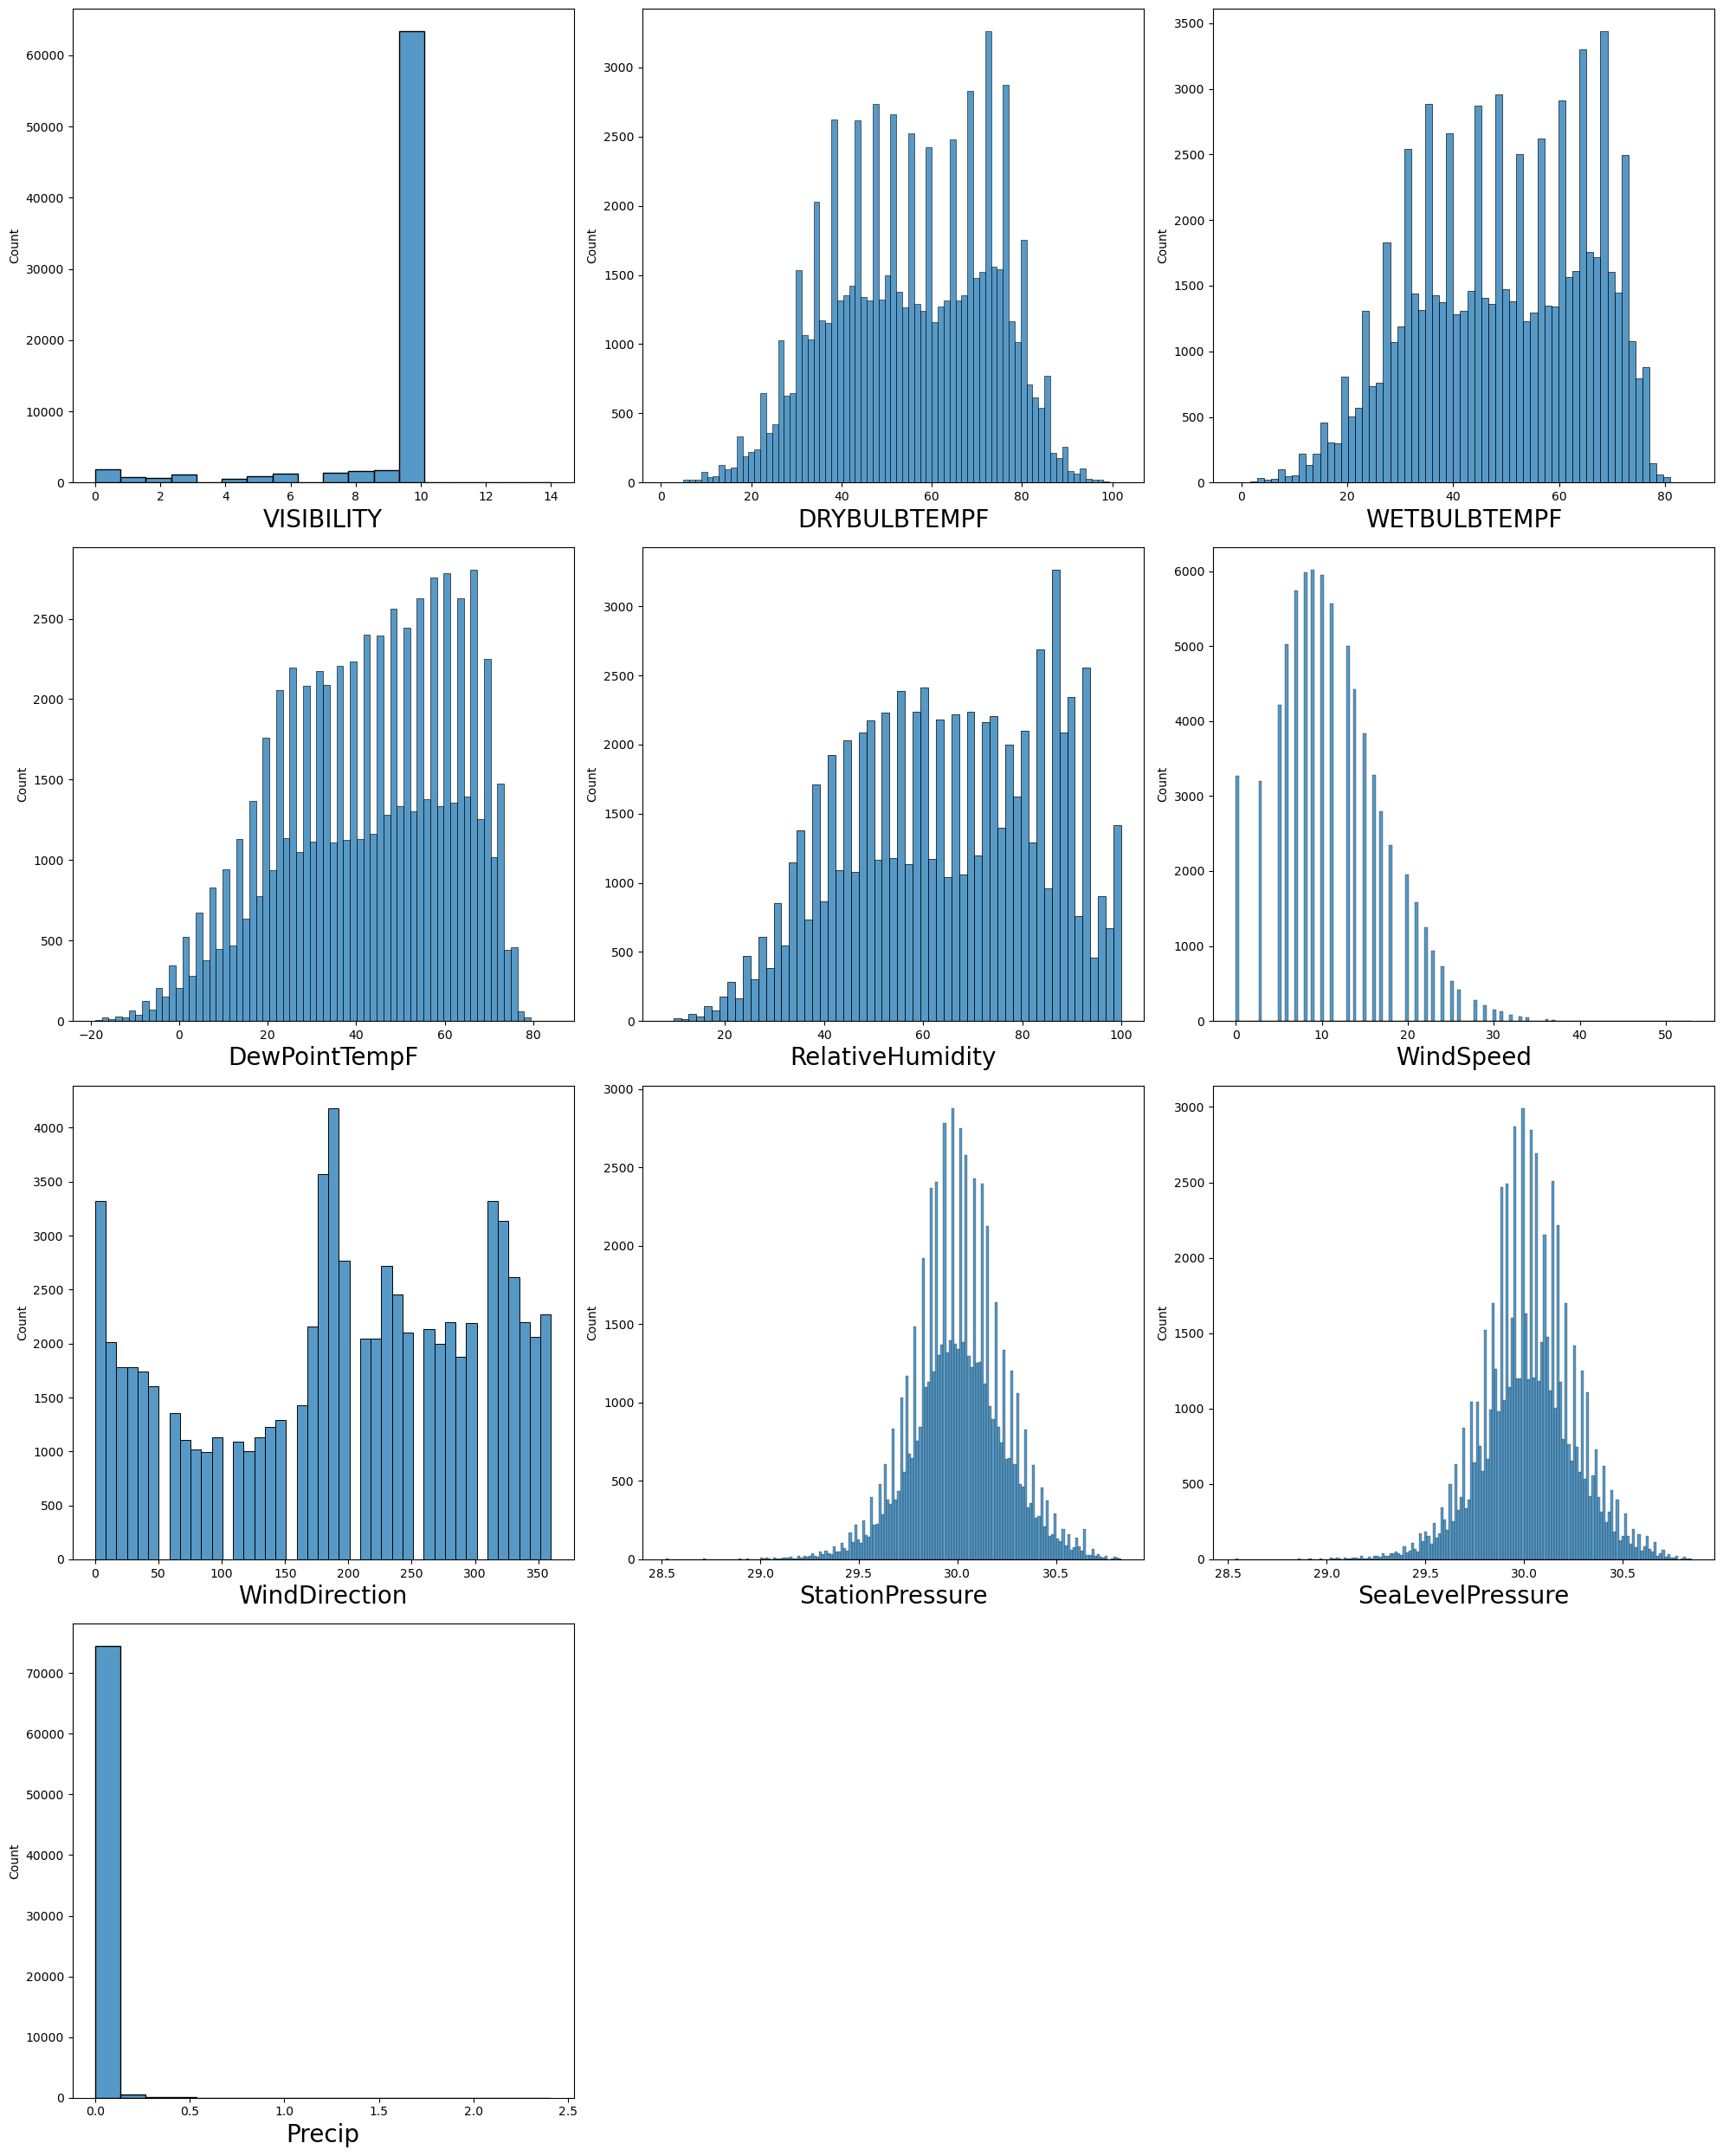

In [7]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in ds.drop(['DATE'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(ds[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

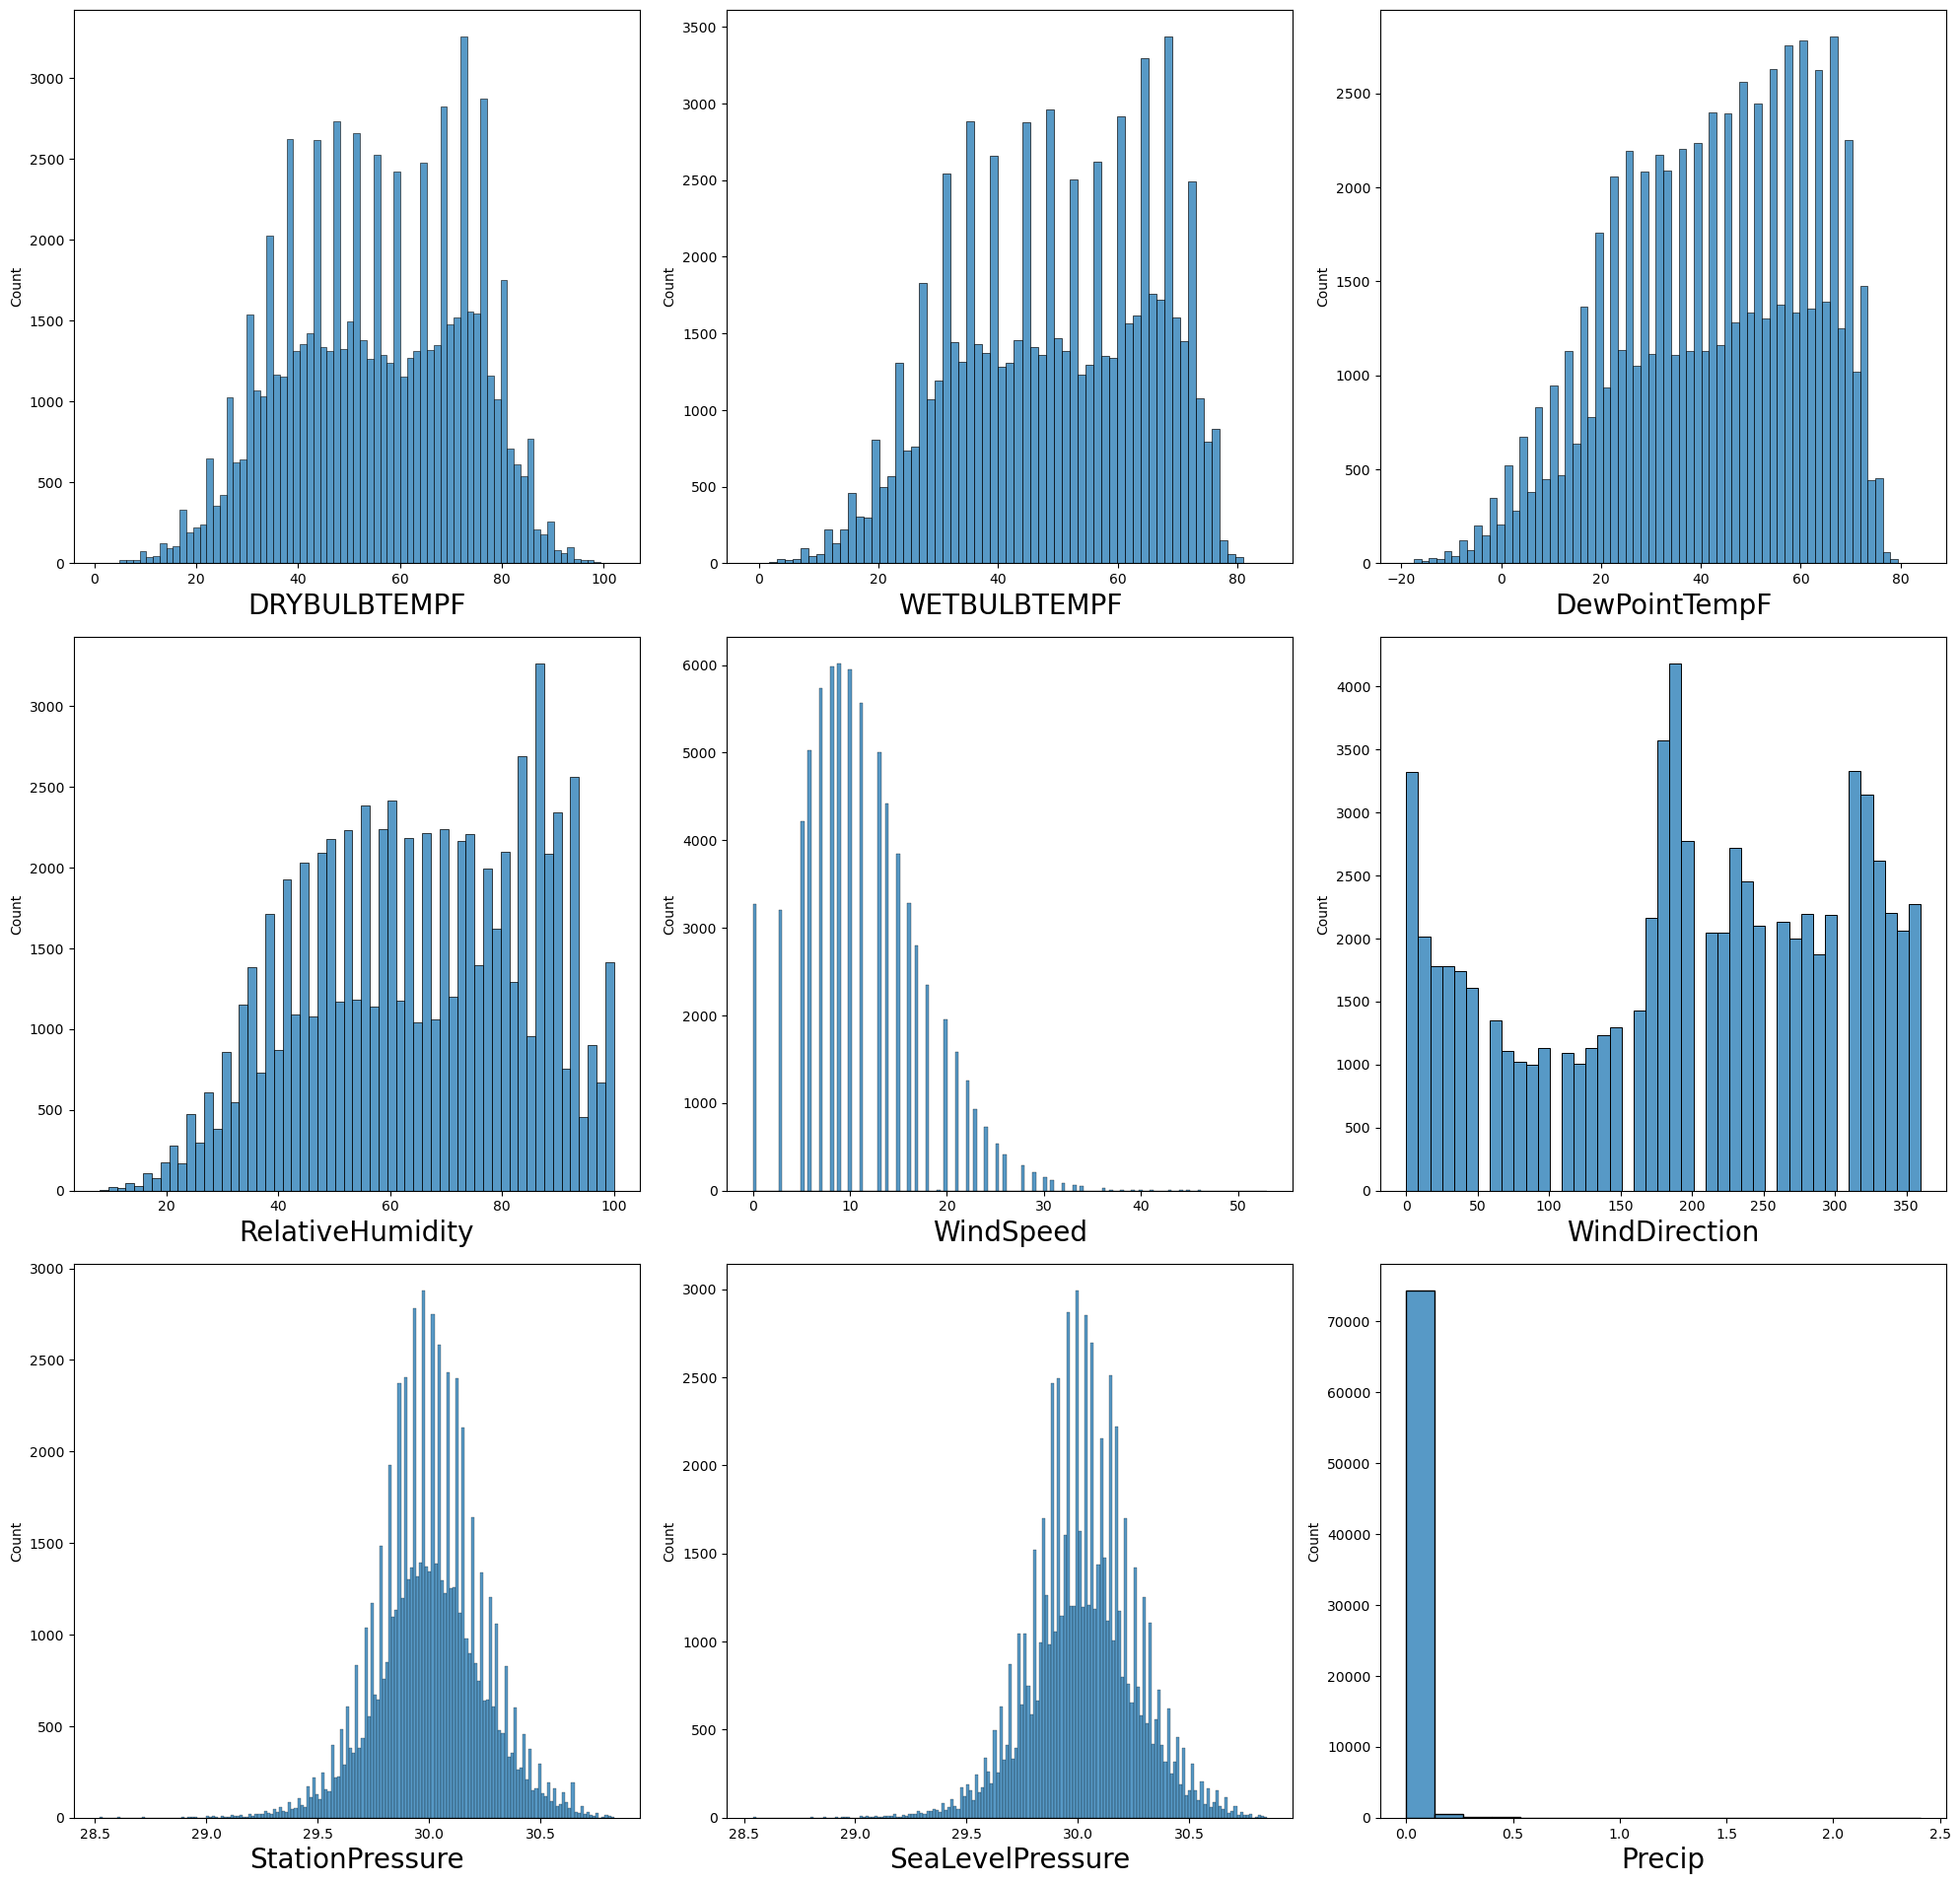

In [8]:
scale = StandardScaler()
X = ds.drop(['DATE','VISIBILITY'],axis=1)
y = ds['VISIBILITY']
X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(X[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [9]:
ds=ds.drop(['DATE','Precip','WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

In [10]:
ds

,VISIBILITY,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure
0,6.0,33.0,92.0,0.0,0.0,29.99
1,6.0,33.0,96.0,0.0,0.0,29.99
2,5.0,33.0,96.0,0.0,0.0,29.99
3,5.0,33.0,96.0,0.0,0.0,29.97
4,5.0,33.0,92.0,0.0,0.0,29.96
...,...,...,...,...,...,...
75078,10.0,76.0,88.0,3.0,230.0,30.02
75079,4.0,69.0,100.0,13.0,40.0,30.01
75080,10.0,71.0,96.0,0.0,0.0,30.04
75081,10.0,72.0,94.0,5.0,50.0,30.02


Modal training

In [11]:
column_names=ds.columns.values

In [12]:
column_names

array(['VISIBILITY', 'DRYBULBTEMPF', 'RelativeHumidity', 'WindSpeed',
       'WindDirection', 'SeaLevelPressure'], dtype=object)

In [13]:
Y=ds["VISIBILITY"]
z=Y

In [14]:
print(z)

0         6.0
1         6.0
2         5.0
3         5.0
4         5.0
         ... 
75078    10.0
75079     4.0
75080    10.0
75081    10.0
75082    10.0
Name: VISIBILITY, Length: 75083, dtype: float64


In [15]:
X=ds.drop(["VISIBILITY"],axis=1)

Clustering

In [16]:
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
  kmeans.fit(X) # fitting the data to the KMeans Algorithm
  wcss.append(kmeans.inertia_)
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
s=kn.knee


In [17]:
import os
original_path=os.getcwd()
for i in range(s):

# Define the folder path
    folder_path=os.getcwd() + "/" + str(i)
    print(folder_path)

# Check if the folder already exists
    if not os.path.exists(folder_path):
    # If the folder doesn't exist, create it
        os.makedirs(folder_path)


C:\Users\Simran Sharma\Desktop\-Visibility-main/0
C:\Users\Simran Sharma\Desktop\-Visibility-main/1
C:\Users\Simran Sharma\Desktop\-Visibility-main/2


In [18]:
kmeans = KMeans(n_clusters=s, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)  

In [19]:
cluster=y_predict

In [20]:
print(Y.shape)
print(cluster.shape)

(75083,)
(75083,)


In [21]:

z=pd.DataFrame(z)
cluster = pd.DataFrame(cluster)
z["Cluster"]=cluster
print(type(cluster))
print(type(z))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
X["Cluster"]=cluster

In [23]:
column_names=X.columns.values

In [24]:
column_names

array(['DRYBULBTEMPF', 'RelativeHumidity', 'WindSpeed', 'WindDirection',
       'SeaLevelPressure', 'Cluster'], dtype=object)

(75083, 2)

In [26]:
def randomforest_():
    global clf
    clf=RandomForestRegressor()
    param_grid = {"n_estimators": [10]#, 50, 100]
                , "criterion": ['squared_error']#, 'absolute_error', 'friedman_mse', 'poisson'],
                               ,"max_depth": range(2, 3, 1), "max_features": ['sqrt']}#,'log2']}
    #clf=RandomForestRegressor()
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
    grid.fit(X_train, y_train)

    #extracting the best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']

    #creating a new model with the best parameters

    clf = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion,
                                    max_depth=max_depth, max_features=max_features)
    # training the mew model
    clf.fit(X_train, y_train)
    predict_clf=clf.predict(X_test)
    global randomForest_error
    randomForest_error = r2_score(y_test,predict_clf)
    return clf

In [27]:
def xg_boost_():
    param_grid_xgboost = {

    'learning_rate': [0.5, 0.1]#, 0.01, 0.001],
    ,'max_depth': [3, 5]#, 10, 20],
    ,'n_estimators': [10, 50]#, 100, 200]
    }
    xgb1 = XGBRegressor()
    # Creating an object of the Grid Search class
    grid= GridSearchCV(#XGBRegressor(objective='reg:squarederror'),
        xgb1,
                       param_grid_xgboost, verbose=3,cv=5)
    # finding the best parameters
    grid.fit(X_train, y_train)

    # extracting the best parameters
    learning_rate = grid.best_params_['learning_rate']
    max_depth = grid.best_params_['max_depth']
    n_estimators = grid.best_params_['n_estimators']
    print(learning_rate,max_depth,n_estimators)
    print(grid.best_params_)

  # creating a new model with the best parameters
    xgb =XGBRegressor(
    max_depth=max_depth,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    verbosity=1)#,
    #objective='reg:squarederror')
  # training the mew model
    xgb.fit(X_train, y_train)
    predict_xgb=xgb.predict(X_test)
    global xgb_error
    xgb_error = r2_score(y_test,predict_xgb)
    return xgb

In [28]:
def decession_tree_():
    param_grid_decisionTree = {'criterion': ['squared_error', 'friedman_mse',],
                                'max_depth': [5, 10]#, 15, 20, 25, 30],
                                ,'max_features': [None, 'sqrt', 'log2'],
                                'max_depth': range(2, 3, 1),
                                'min_samples_split': range(2, 3, 1),
                             'splitter': ['best', 'random']
                              }
    dt=DecisionTreeRegressor()
    # Creating an object of the Grid Search class
    grid = GridSearchCV(dt, param_grid_decisionTree, verbose=3,cv=5)
    # finding the best parameters
    grid.fit(X_train, y_train)

    # extracting the best parameters
    criterion = grid.best_params_['criterion']
    splitter = grid.best_params_['splitter']
    max_features = grid.best_params_['max_features']
    max_depth  = grid.best_params_['max_depth']
    min_samples_split = grid.best_params_['min_samples_split']

    # creating a new model with the best parameters
    decisionTreeReg = DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,min_samples_split=min_samples_split)
    # training the mew models
    decisionTreeReg.fit(X_train, y_train)
    predict_dt=decisionTreeReg.predict(X_test)
    global dt_error
    dt_error=r2_score(y_test,predict_dt)
    return decisionTreeReg

In [29]:
model={}
error=[]
list_of_clusters=X['Cluster'].unique()    
for i in list_of_clusters:

    cluster_data=X[X['Cluster']==i]
    cluster_data=cluster_data.drop("Cluster",axis=1)
    cluster_data_2=z[z['Cluster']==i]
    cluster_data2=cluster_data_2.drop("Cluster",axis=1)# filter the data for one cluster
    X_train, X_test, y_train, y_test = train_test_split(cluster_data, cluster_data_2, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    dtdt=decession_tree_()
    xgbxgb=xg_boost_()
    rfrf=randomforest_()
    error.append(randomForest_error)

    error.append(xgb_error)
    error.append(dt_error)



    if randomForest_error < xgb_error and randomForest_error < dt_error:
        model[i]=dtdt
        pickle.dump(dtdt, open(str(i)+"/"+'model_.pkl', 'wb'))

    elif xgb_error < dt_error and xgb_error < randomForest_error:
        model[i]=xgbxgb



        pickle.dump(xgbxgb, open(str(i)+"/"+'model_.pkl', 'wb'))
    else:
        model[i]=dtdt

        pickle.dump(dtdt, open(str(i)+"/"+'model_.pkl', 'wb'))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.699 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.717 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.540 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, 

[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.262 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.269 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.259 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.255 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.266 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.266 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.278 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.269 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.259 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.275 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=10

[CV 3/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.624 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.724 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.551 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.652 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.524 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.675 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.718 total time=   0.0s
[CV 5/5] END criterion=friedman_mse

[CV 5/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.693 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.694 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.686 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.666 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.716 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.530 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.507 total time=   0.0s
[CV 2/5] END criterion=squared

[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.261 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.269 total time=   0.3s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.245 total time=   0.3s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.270 total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.285 total time=   0.3s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=50;, score=0.257 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=-0.655 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=-0.694 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=-0.528 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=10;, score=-0.507 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimator

In [30]:
model

{1: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 0: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, f

In [31]:
error

[0.6994807303504047,
 0.2722596281548034,
 0.7145305323172175,
 0.7157176581879674,
 0.32965918460099863,
 0.7506482307622856,
 0.6795851305296129,
 0.2839133381350632,
 0.7119606140108572]

Prediction

In [32]:
ds_test=pd.read_csv("Good_Raw_Data.csv")

In [33]:
ds_test=ds_test.drop(['DATE','Precip','WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

In [34]:
ds_test

,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure
0,58.0,70.0,31.0,180.0,29.90
1,56.0,77.0,29.0,180.0,29.90
2,55.0,80.0,25.0,180.0,29.91
3,54.0,87.0,24.0,180.0,29.92
4,54.0,87.0,23.0,170.0,29.91
...,...,...,...,...,...
12509,47.0,71.0,6.0,60.0,30.27
12510,47.0,74.0,6.0,70.0,30.28
12511,47.0,74.0,7.0,50.0,30.28
12512,47.0,74.0,7.0,50.0,30.28


In [35]:
y_test_predict= kmeans.predict(ds_test)  

In [36]:
y_test_predict

array([2, 2, 2, ..., 1, 1, 1])

In [37]:
cluster=y_test_predict

In [38]:
ds_test["Cluster"]=cluster

In [39]:
ds_test

,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure,Cluster
0,58.0,70.0,31.0,180.0,29.90,2
1,56.0,77.0,29.0,180.0,29.90,2
2,55.0,80.0,25.0,180.0,29.91,2
3,54.0,87.0,24.0,180.0,29.92,2
4,54.0,87.0,23.0,170.0,29.91,2
...,...,...,...,...,...,...
12509,47.0,71.0,6.0,60.0,30.27,1
12510,47.0,74.0,6.0,70.0,30.28,1
12511,47.0,74.0,7.0,50.0,30.28,1
12512,47.0,74.0,7.0,50.0,30.28,1


In [40]:
result=[]
list_of_clusters=ds_test['Cluster'].unique()    
for i in list_of_clusters:
    folder_path2=original_path+ '/' + str(i)
    os.chdir(folder_path2)


    cluster_data=ds_test[ds_test['Cluster']==i]
    cluster_data=cluster_data.drop("Cluster",axis=1)# filter the data for one cluster
    ds_pred = scaler.transform(cluster_data)
    with open("model_.pkl", 'rb') as model_file:
        load_model = pickle.load(model_file)

        result_i=load_model.predict(ds_pred)
    result.append(result_i)
    print(result_i)




[[9.849951  1.9922675]
 [9.762524  1.9922675]
 [9.705083  1.9922675]
 ...
 [9.14307   1.9922675]
 [9.16244   1.9922675]
 [6.922478  1.9922675]]
[[9.8408594e+00 2.5775507e-03]
 [9.8962202e+00 2.5775507e-03]
 [9.4654808e+00 2.5775507e-03]
 ...
 [1.9038997e+00 2.5775507e-03]
 [8.4366369e+00 2.5775507e-03]
 [9.9449997e+00 2.5775507e-03]]
[[9.960415   0.99742216]
 [9.960415   0.99742216]
 [9.949821   0.99742216]
 ...
 [9.901237   0.99742216]
 [9.901237   0.99742216]
 [9.719796   0.99742216]]


In [41]:
result

[array([[9.849951 , 1.9922675],
        [9.762524 , 1.9922675],
        [9.705083 , 1.9922675],
        ...,
        [9.14307  , 1.9922675],
        [9.16244  , 1.9922675],
        [6.922478 , 1.9922675]], dtype=float32),
 array([[9.8408594e+00, 2.5775507e-03],
        [9.8962202e+00, 2.5775507e-03],
        [9.4654808e+00, 2.5775507e-03],
        ...,
        [1.9038997e+00, 2.5775507e-03],
        [8.4366369e+00, 2.5775507e-03],
        [9.9449997e+00, 2.5775507e-03]], dtype=float32),
 array([[9.960415  , 0.99742216],
        [9.960415  , 0.99742216],
        [9.949821  , 0.99742216],
        ...,
        [9.901237  , 0.99742216],
        [9.901237  , 0.99742216],
        [9.719796  , 0.99742216]], dtype=float32)]

In [42]:
folder_path2=os.getcwd() + '/' + str(0)
print(folder_path2)

C:\Users\Simran Sharma\Desktop\-Visibility-main\1/0


In [43]:
result1=[]
for i in range(len(result)):
    z=len(result[i])
    for j in range(len(result[i])):
        #result[i][j])
        result1.append(result[i][j][0])


In [44]:
ds_test["Visibility"]=result1

In [45]:
ds_test=ds_test.drop("Cluster",axis=1)

In [46]:
ds_test

,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure,Visibility
0,58.0,70.0,31.0,180.0,29.90,9.849951
1,56.0,77.0,29.0,180.0,29.90,9.762524
2,55.0,80.0,25.0,180.0,29.91,9.705083
3,54.0,87.0,24.0,180.0,29.92,8.342916
4,54.0,87.0,23.0,170.0,29.91,7.649809
...,...,...,...,...,...,...
12509,47.0,71.0,6.0,60.0,30.27,9.906764
12510,47.0,74.0,6.0,70.0,30.28,9.901237
12511,47.0,74.0,7.0,50.0,30.28,9.901237
12512,47.0,74.0,7.0,50.0,30.28,9.901237
